# Project

#### Stefano Riato
#### Matricola ID: 894041
#### Ca' Foscari University of Venice
#### Project for Lab of Information Systems and Analytics
#### May 2024

# Summary of the Project Roadmap

1. **Load Dataset**
2. **Data Cleaning** 
3. **Exploratory Data Analysis (EDA)** 
4. **Data Pre-processing**
5. **Feature Engineering**
6. **Model Training, Hyper-Tuning parameters and Evaluation**
7. **Conclusions**



# Load Dataset

In [1]:
# Importing libraries and setting options
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt     # To plot graphs
import seaborn as sns               # To plot graphs
sns.set_style('whitegrid')          # To set the style of the graphs

pd.options.display.max_columns = 90 # To display all the columns of the dataframe   

In [2]:
data_full = pd.read_csv('../datasets/bank/bank-full.csv', sep=';')


# Data Cleaning

In this part we are going to:

- **Handling missing values**: I will identify columns with missing values and decide how to handle them, for example by deleting rows, filling with the mean or median, or using more advanced imputation methods.
- **Removing outliers**: I will use statistical methods to identify and remove outliers that could distort the analysis.
- **Coding of categorical variables**: I will transform the categorical variables into a format that can be used for analysis, for example using one-hot coding or label coding.
- **Data normalization**: If necessary, I will normalize the data to bring all variables to a common scale. 

In [3]:
# the shape of the dataset 
print('The dataset has {} rows and {} columns.'.format(data_full.shape[0], data_full.shape[1]))
print('\n')
# look at the first lines of the dataset
data_full.head()



The dataset has 45211 rows and 17 columns.




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# look at the last lines of the dataset
data_full.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
# Get information about the dataset (data types, number of non-null values, etc.)
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The dataset does not contain any NaN values. But we need to confirm that. So we use the code below:

In [6]:
# Check if there is some NaN values
if (data_full.isnull().values.any()) == True:
    print('There are NaN values in the dataset.')
else:
    print('There are no NaN values in the dataset.')

There are no NaN values in the dataset.


We investigate the dataset with some statistics:

In [7]:
data_full.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


We can notice that pdays has a lot of -1 values. We need to investigate this column.
So we use the code below to check the number of -1 values in the pdays column:

In [8]:
# data cleaning -> check if there are too many -1 in the pdays column in order to drop them or the column
data_full['pdays']
count = 0
count1 = 0
for i in data_full['pdays']:
    if i == -1:
        count += 1
    else:
        count1 += 1

print(f'-1 : {count}')
print(f'not -1 : {count1}')


-1 : 36954
not -1 : 8257


We can see that the column pdays has a lot of -1 values. This column is not useful for the prediction of the target variable y since it is not heterogeneous. So we can decide to drop it.

In [21]:
data_full = data_full.drop(['pdays'], axis=1)
data_full.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no


# Exploratory Data Analysis (EDA)

- **Univariate analysis**: I will examine the distribution of each variable, for example using histograms or box plots.
- **Bivariate analysis**: I will examine relationships between pairs of variables, for example using scatter plots or calculating correlation coefficients.
- **Multivariate analysis**: I will examine relationships between multiple variables, for example using correlation matrices or dimensionality reduction techniques such as principal component analysis (PCA).

First, we analyse the variable to predict, which is the column y (if the client will subscribe a term deposit or not). We can see if the problem is balanced. This will affect how we evaluate the models.

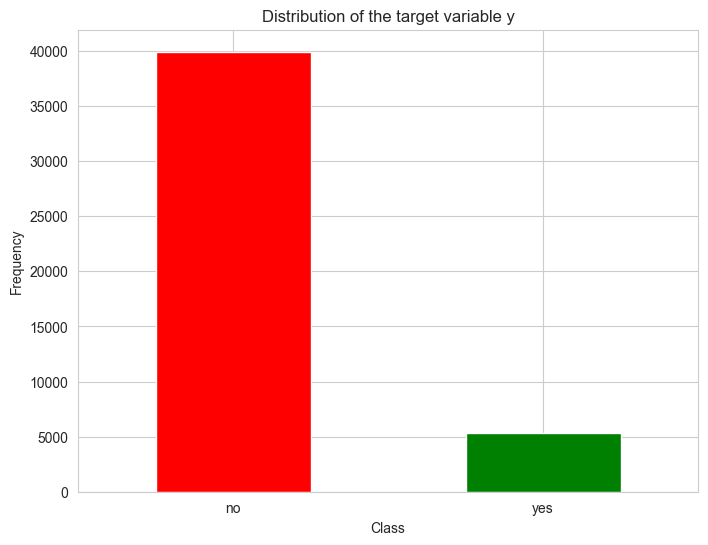

In [22]:
# frequency
y_counts = data_full['y'].value_counts()

# bar plt graph
plt.figure(figsize=(8, 6))
y_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of the target variable y')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


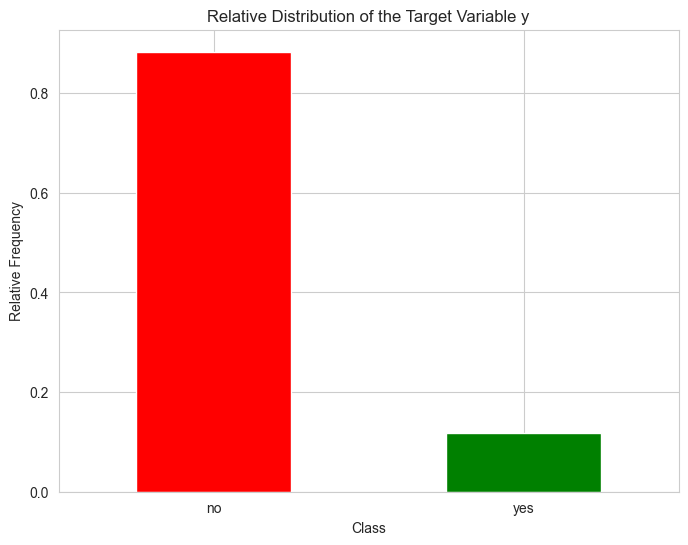

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

In [23]:
# Calculate the relative frequency of the target variable 'y'
y_relative_frequency = data_full['y'].value_counts(normalize=True)

# Plotting the relative frequency as a bar plot
plt.figure(figsize=(8, 6))
y_relative_frequency.plot(kind='bar', color=['red', 'green'])
plt.title('Relative Distribution of the Target Variable y')
plt.xlabel('Class')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

y_relative_frequency

We perfomed an univariate analysis of the target variable y (Graph 1). We can see that the dataset is unbalanced. The variable y has more or less *40.000* instances of the class 'no' and *5.000* instances of the class 'yes'. This is a problem because the model will be biased towards the class 'no' and it will not be able to predict the class 'yes' correctly.

From this graph we can see a relative frequency of *88.3%* of the class 'no' and only *11.7%* of the class 'yes'. So the dataset is imbalanced.

So we know that we need to use stratified cross-validation, using the *StratifiedKFold* class from the *sklearn.model_selection* module.

In this way we split the data such that the proportion between classes are the same in each fold as they are in the whole dataset.



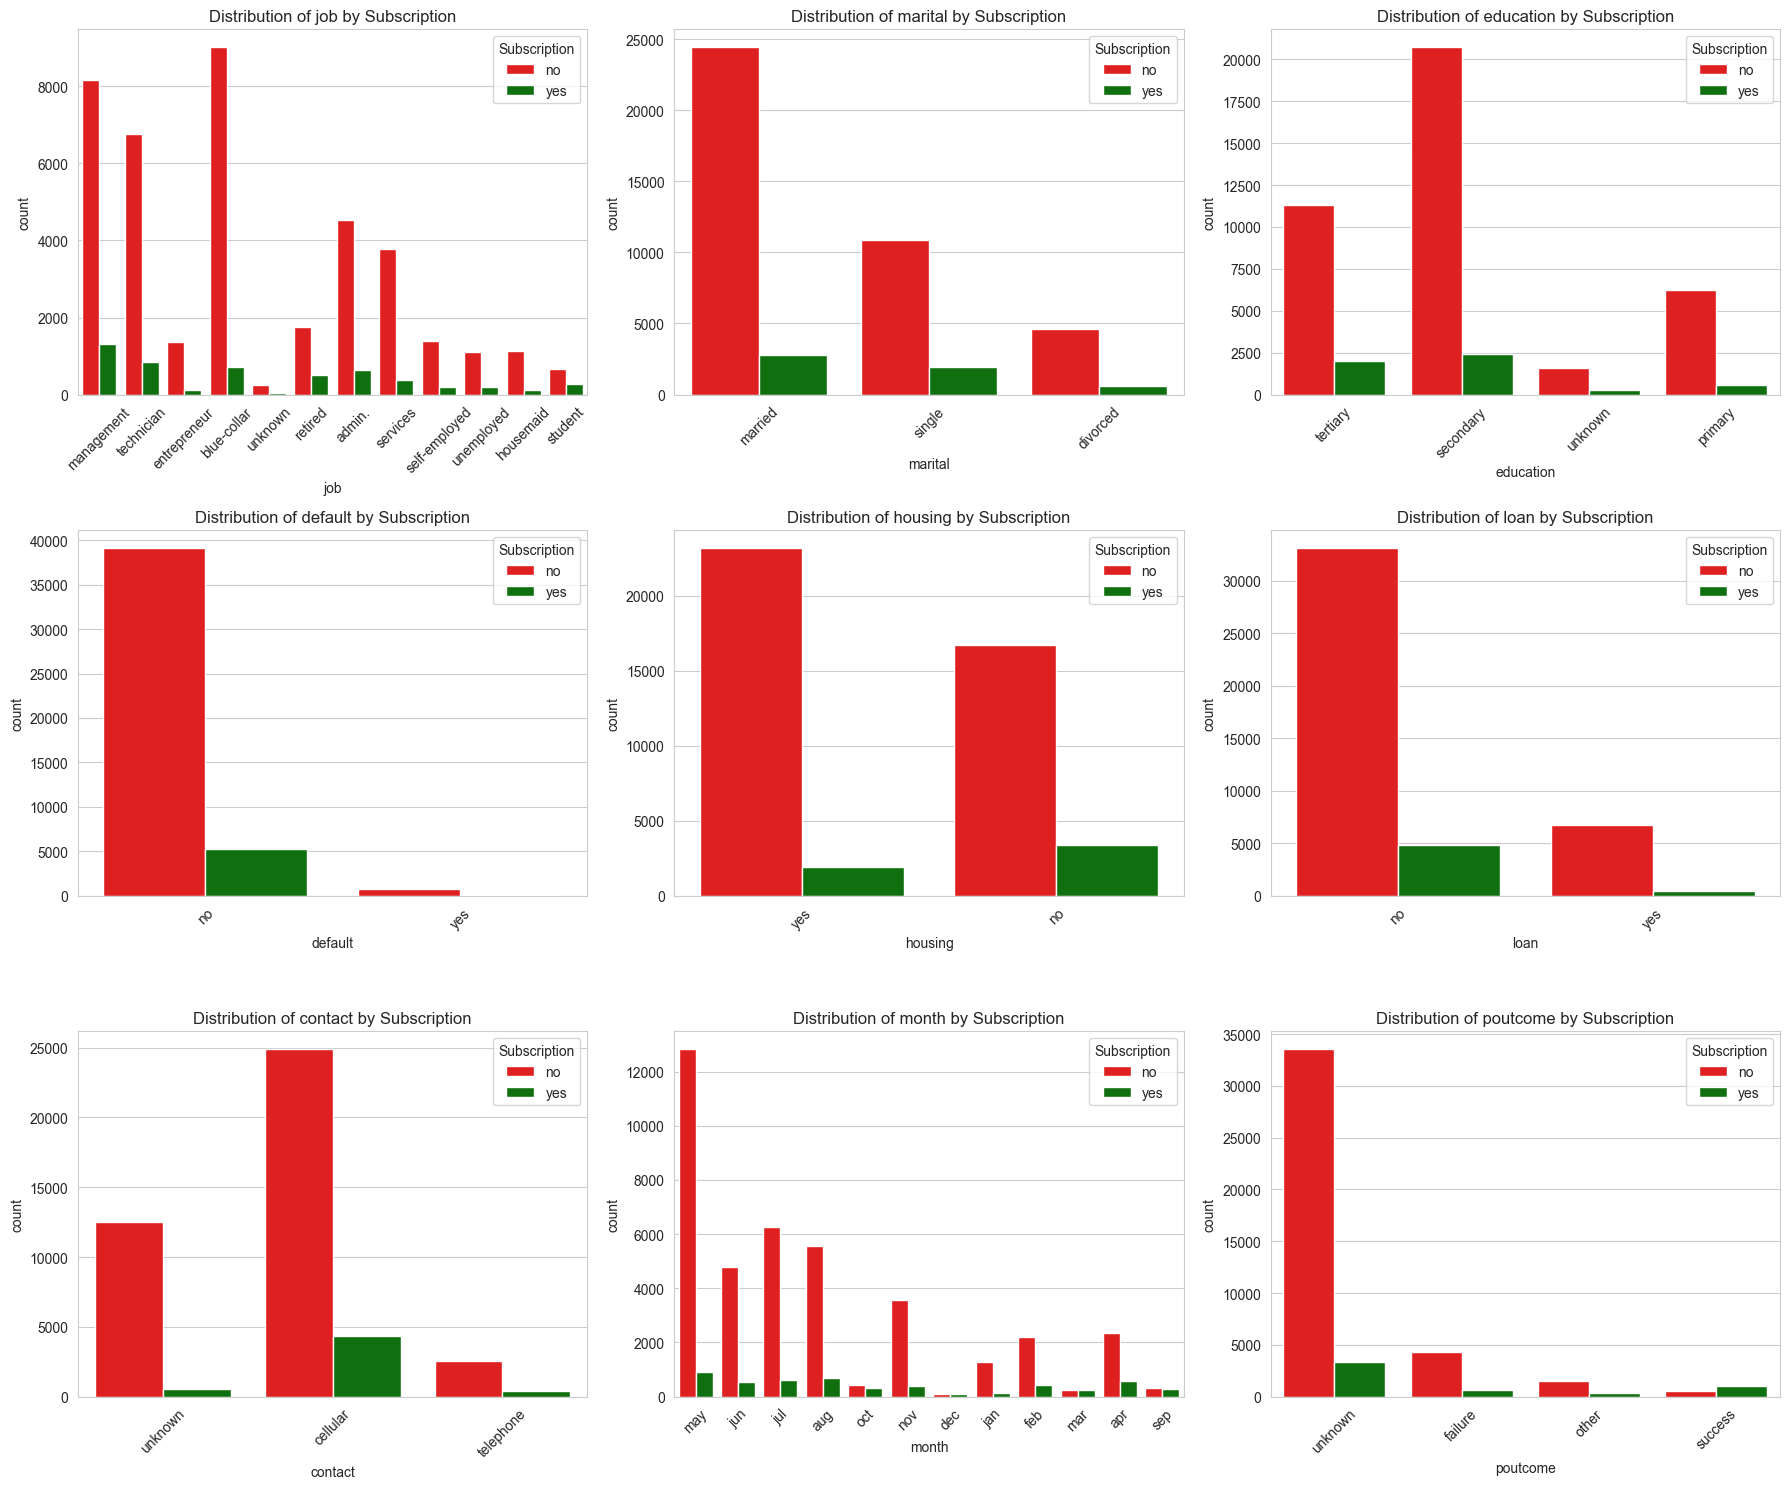

In [24]:
# Visualizing the distribution of categorical variables with respect to the target variable 'y'

fig, axs = plt.subplots(3, 3, figsize=(18, 15))
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for i, var in enumerate(cat_vars):
    row = i // 3
    col = i % 3
    sns.countplot(data=data_full, x=var, hue='y', ax=axs[row, col], palette=['red', 'green'])
    axs[row, col].set_title(f'Distribution of {var} by Subscription')
    axs[row, col].tick_params(axis='x', rotation=45)
    axs[row, col].legend(title='Subscription', loc='upper right')

fig.tight_layout()
plt.show()


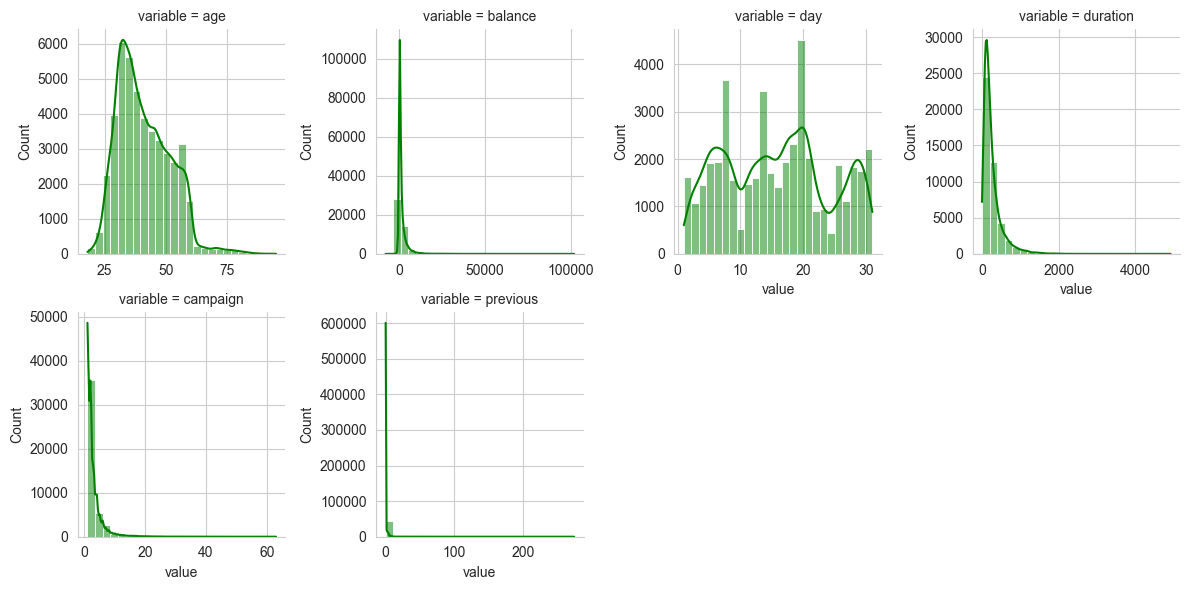

In [25]:
# Create a dataframe with only the numerical variables
data_num = data_full.select_dtypes(include=['int64', 'float64'])
# Melt the data into a long format so that I can plot the distribution of all numerical variables
pd.melt(data_full, value_vars=data_num.columns).groupby('variable').describe()

# Let's plot the distribution of all numerical variables
# Melt the data into a long format so that I can plot the distribution of all numerical variables
melt = pd.melt(data_full, value_vars=data_num.columns) 

# Wrap the columns to make it easier to read
g = sns.FacetGrid(melt, col="variable",  col_wrap=4, sharex=False, sharey=False) 

# Plot the distribution of each variable
g = g.map(sns.histplot, "value", bins=25, color="green", kde=True)

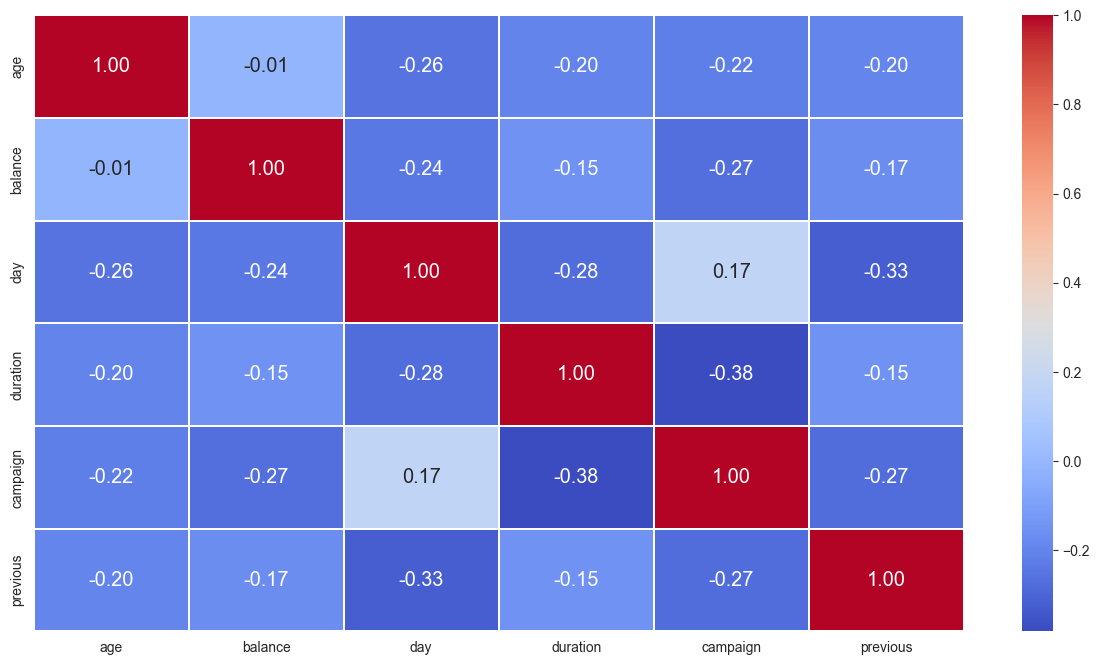

In [27]:
corr = data_full.select_dtypes(include=['int64', 'float64']).corr()

# Let's see the correlation between the numerical variables
# I will use the heatmap function from the seaborn library
# Select only numeric columns

# Now you can calculate the correlation
plt.figure(figsize=(15,8))

sns.heatmap(corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2, 
    annot_kws={"size": 35 / np.sqrt(len(corr.corr()))})

plt.show();

In [13]:
# Investigate the distribution of nominal features

# Count how many nominal, ordinal, continuous and discrete features there are in the dataset
nominal = 0
ordinal = 0
continuous = 0
discrete = 0
for col in data_full.columns:
    if data_full[col].dtype == 'object':
        #print(f'{col} is a nominal feature')
        nominal += 1
    elif data_full[col].dtype == 'int64':
        #print(f'{col} is a discrete feature')
        discrete += 1
    elif data_full[col].dtype == 'float64':
    
        continuous += 1
    else:
        ordinal += 1

print('There are {} nominal features, {} ordinal features, {} continuous features and {} discrete features.'.format(nominal, ordinal, continuous, discrete))

There are 10 nominal features, 0 ordinal features, 0 continuous features and 7 discrete features.


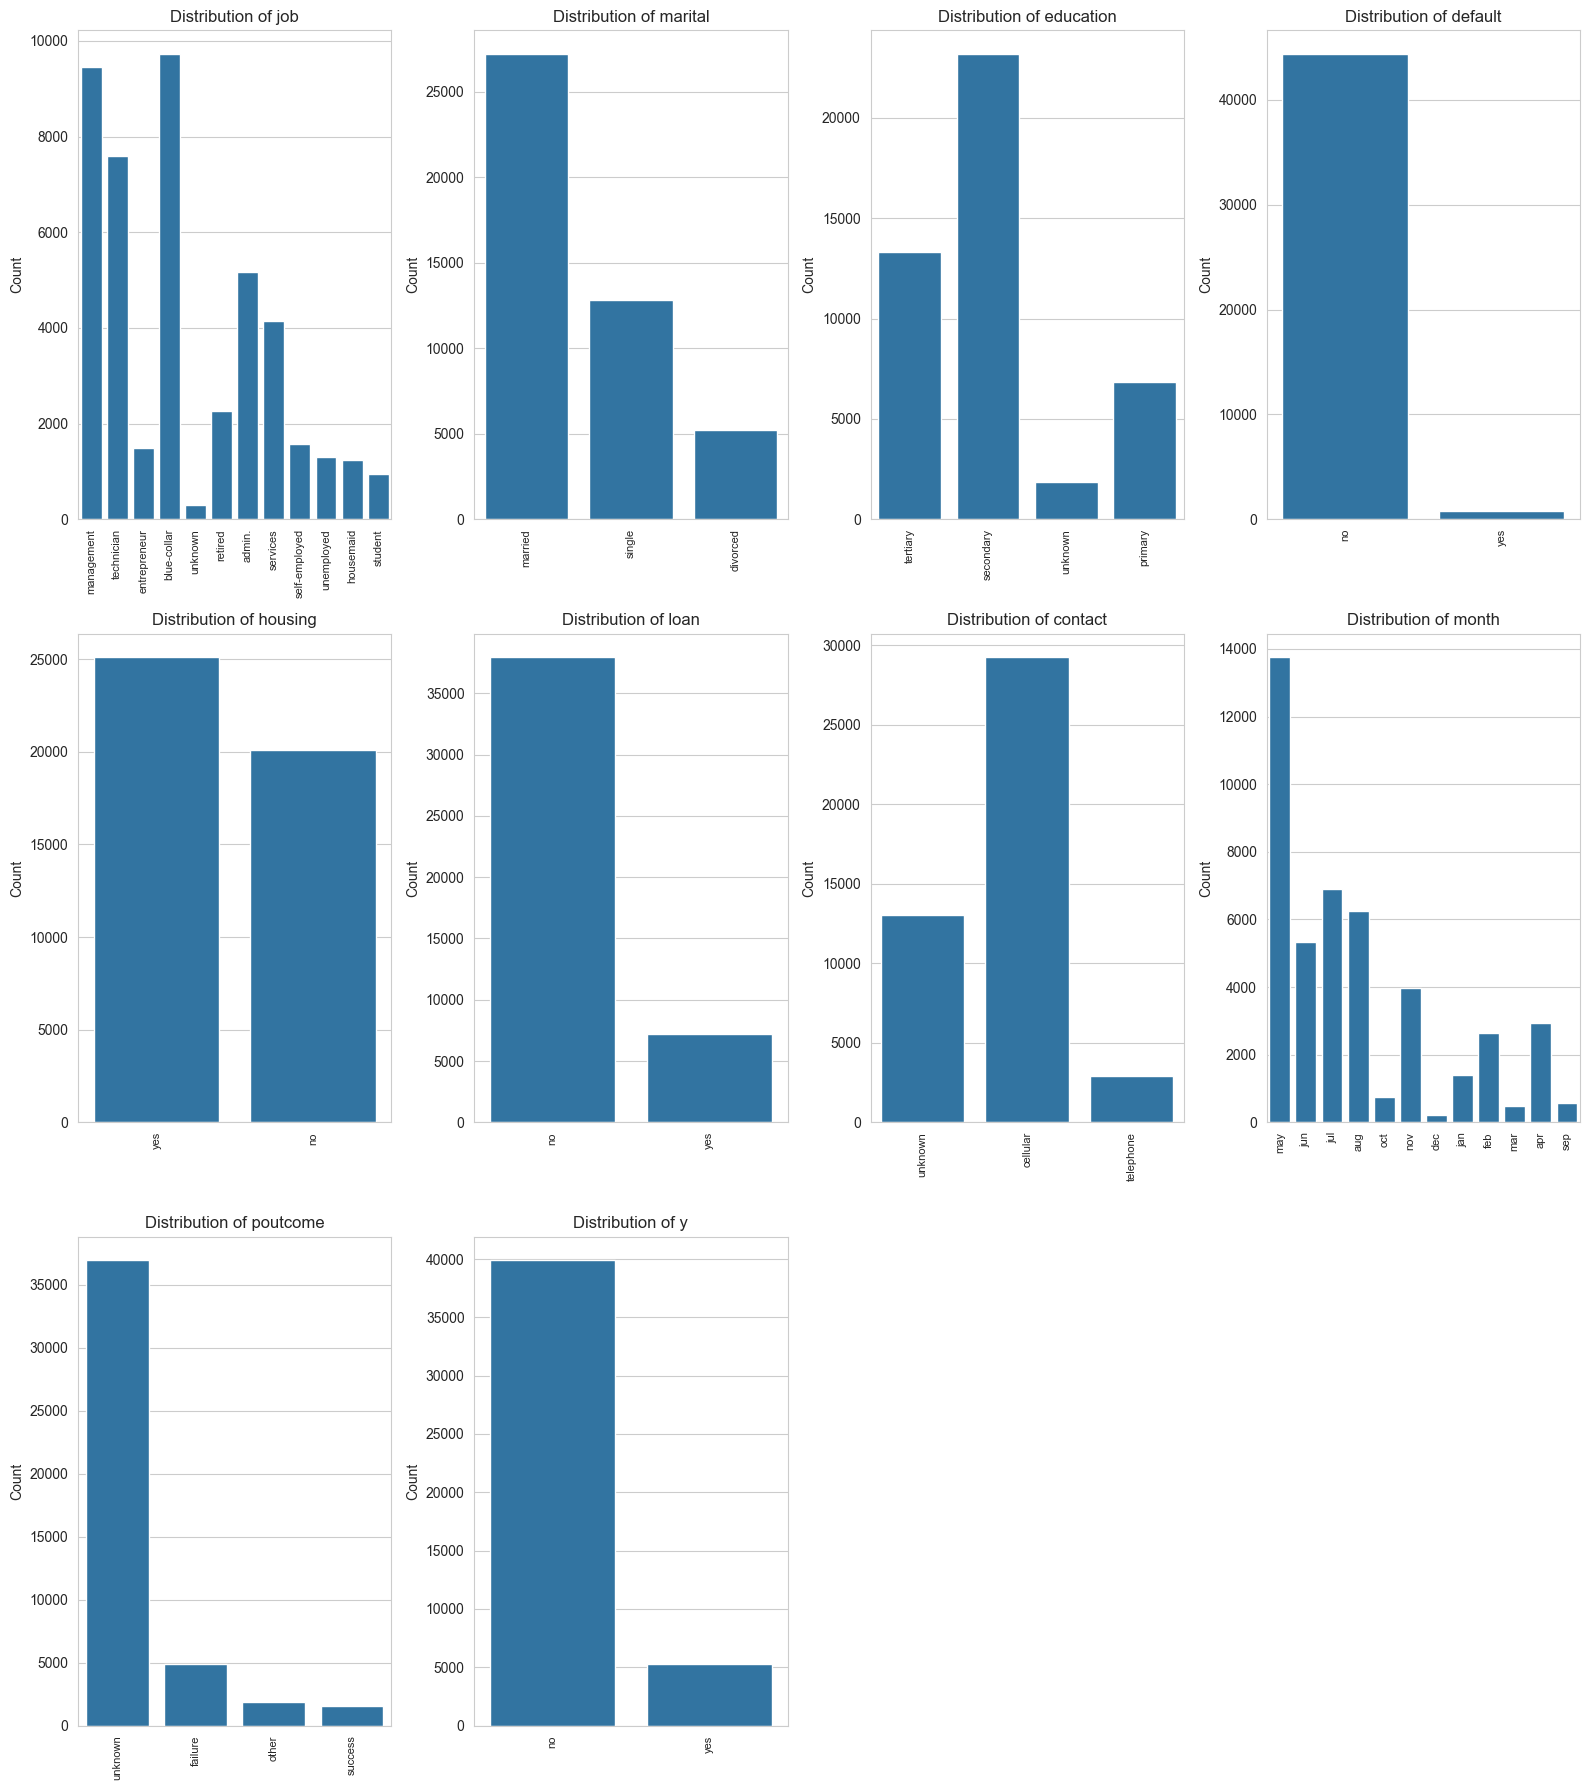

In [14]:
# Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# First of all, I need to select the norminal features
nominal_features = list(col for col in data_full.columns if data_full[col].dtype == 'object')

# Then, I can plot the distribution of each norminal feature in a subplot figure
n_cols = 4 
n_rows = int(np.ceil(len(nominal_features) / n_cols)) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*6)) 
# flatten the axes array to 1-d
axes = axes.ravel() 
for i, col in enumerate(nominal_features):
    sns.countplot(x=col, data=data_full, ax=axes[i]) 
    axes[i].set_title(f'Distribution of {col}') 
    # smaller font for x-tick labels
    plt.setp(axes[i].get_xticklabels(), rotation=90, fontsize=8) 
    # remove the x-axis label and set the label padding
    axes[i].set_xlabel('', labelpad=10)
    axes[i].set_ylabel('Count')

# if there are more subplots than features to plot, hide the empty subplots
if n_cols*n_rows > len(nominal_features): 
    for i in range(len(nominal_features), n_cols*n_rows):
        axes[i].axis('off')

# adjust the subplot layout to fill the figure area
plt.tight_layout() 
plt.show()

# Pre-Processing Data

## Investigate the distribution of nominal features

In [ ]:
corr = df_dummy.corr() #df_dummy is the dataframe with the dummy variables
# we set the diagonal to zero
for i in range(len(corr)):
    corr.iloc[i,i] = 0  # we do not want to consider the self correlation among the variables

# we plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

top_corr = corr.unstack() #what is this? 
# .unstack() trasforma un DataFrame o una Serie con un indice MultiLivello in un nuovo DataFrame con un indice meno annidato.
# Questo è utile per ristrutturare i dati in modo che ogni gruppo di valori correlati sia spostato in una colonna separata.
# Qui, trasformiamo la matrice di correlazione in una Serie con coppie di variabili come indici multipli e i valori di correlazione come valori della Serie.


